# CDS521: Multimodal Information Retrieval

**Project Title**: Flower Classification Using Neural Network <br>
**Author**: Teoh Jia Jun PCOM0069/19 <br>
**Tags**: image recognition, neural network, keras

## Problem Statement

Neural network is one of the popular algorithm in image recognition field. In this project, I tends to explore the accuracy of neural network in classifying images of different species of flowers.


## Dataset

**Original Dataset** <br>
This dataset is obtained from kaggle: (https://www.kaggle.com/olgabelitskaya/flower-color-images)

The original dataset contains 210 PNG images (128x128x3) with 10 species of flowering plants and a csv contains the class labels respectively.

The class labels included: <br>
0 => phlox <br>
1 => rose <br>
2 => calendula <br>
3 => iris <br>
4 => leucanthemum maximum <br>
5 => bellflower <br>
6 => viola <br>
7 => rudbeckia laciniata (Goldquelle) <br>
8 => peony <br>
9 => aquilegia <br>

**Transformed Dataset** <br>
To meet the assessment criteria, I have developed a small program "extract_image_2_excel.ipynb" which read the flower images as input, extract the pixel information and stored in a csv file. These images are rgb coloured, hence, I transformed to grayscale

The final result of the dataset is a 210 rows x 16385 columns(128 x 128 pixels and 1 column for class labels) csv file.

In [1]:
# imports
import numpy as np 
import pandas as pd

# the extracted csv
CSV_DIR = "flower_images/flowers_grayscale2.csv"

In [2]:
# Load CSV
flowers = pd.read_csv(CSV_DIR, header=None)
N = flowers.shape

In [3]:
# Extract all cols except last col as input features
features = flowers.iloc[:,0:N[1]-1].to_numpy()

# extract last col as class labels
Y = flowers.iloc[:,-1]

# check size
print(features.shape, Y.shape)

(210, 16384) (210,)


In [4]:
X = np.zeros([210, 128, 128,1])

for i in range(0,features.shape[0]):
    temp = np.reshape(features[i, :], (128,128))
    X[i] = temp[:,:, np.newaxis]

In [5]:
X.shape

(210, 128, 128, 1)

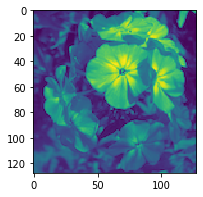

In [6]:
#try print one image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

imgcv = X[0][:, :, 0]
plt.figure(figsize=(3,3))
plt.imshow(imgcv)

In [7]:
Y.head()

0    0.0
1    0.0
2    2.0
3    0.0
4    0.0
Name: 16384, dtype: float64

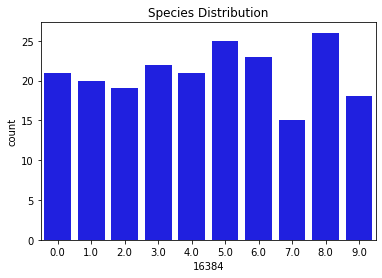

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st

# plot histogram
plt.figure(1)
plt.title('Species Distribution')
plt.ylabel('count')
sns.countplot(Y, color='blue')

### Data Transform

One hot encoding method is applied to transform label class. While all input features are normalized by deviding the max pixel (i.e. 255) which will rescale the data range to (0-1)

In [9]:
# transform data
import tensorflow as tf
from keras.utils import to_categorical

Y = to_categorical(Y, 10)
X = X.astype("float32") / X.max()

print('Min: %.3f, Max: %.3f' % (X.min(), X.max()))

Min: 0.000, Max: 1.000


Using TensorFlow backend.


### Splitting Data

Data is splitted to test=20%, train=60%, validation=20%

In [10]:
# splitting data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2


## Model Development

Neural network is used with 4 layers. The first 3 layers using relu as activation function while the last layer using softmax.

In [4]:
# model
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

model = Sequential([
    Dense(128, activation='relu', input_shape=(128,128,1)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128, 128, 128)     256       
_________________________________________________________________
dense_7 (Dense)              (None, 128, 128, 64)      8256      
_________________________________________________________________
dense_8 (Dense)              (None, 128, 128, 32)      2080      
_________________________________________________________________
flatten_3 (Flatten)          (None, 524288)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5242890   
Total params: 5,253,482
Trainable params: 5,253,482
Non-trainable params: 0
_________________________________________________________________


### Train Model

In [12]:
def summarize_model(model, history, trainX, trainy, testX, testy):
    # evaluate the model
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    
    plt.figure(figsize=(10,10))
    
    # plot loss during training
    plt.subplot(211)
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    
    # plot accuracy during training
    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    plt.show()

In [13]:
# train model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)

Train on 126 samples, validate on 42 samples
Epoch 1/10
126/126 [==============================] - 3s 22ms/step - loss: 4.5984 - accuracy: 0.0794 - val_loss: 3.4494 - val_accuracy: 0.0714
Epoch 2/10
126/126 [==============================] - 3s 22ms/step - loss: 2.5135 - accuracy: 0.2143 - val_loss: 2.3902 - val_accuracy: 0.2381
Epoch 3/10
126/126 [==============================] - 3s 21ms/step - loss: 2.0164 - accuracy: 0.2937 - val_loss: 2.4861 - val_accuracy: 0.1429
Epoch 4/10
126/126 [==============================] - 3s 21ms/step - loss: 1.7831 - accuracy: 0.4524 - val_loss: 2.3763 - val_accuracy: 0.2619
Epoch 5/10
126/126 [==============================] - 3s 21ms/step - loss: 1.5979 - accuracy: 0.4841 - val_loss: 2.4143 - val_accuracy: 0.2143
Epoch 6/10
126/126 [==============================] - 3s 21ms/step - loss: 1.2317 - accuracy: 0.5952 - val_loss: 2.5100 - val_accuracy: 0.1667
Epoch 7/10
126/126 [==============================] - 3s 21ms/step - loss: 1.0058 - accuracy: 0.7

Train: 0.984, Test: 0.214


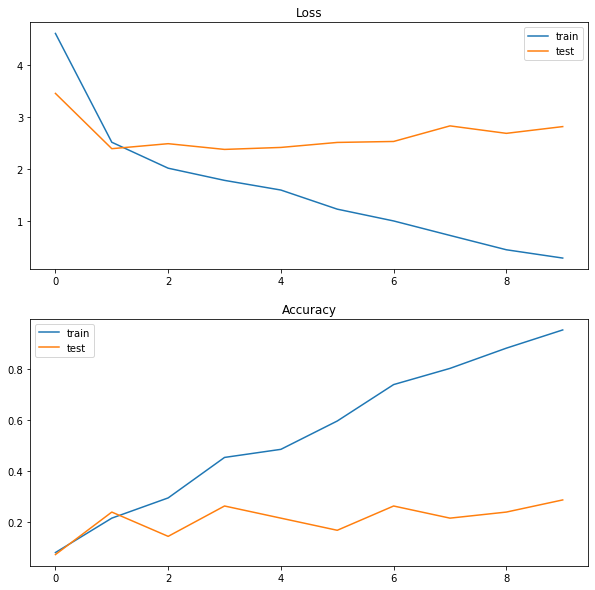

In [14]:
summarize_model(model, history, x_train, y_train, x_test, y_test)

## CNN

In [3]:
#create model
cnn_model = Sequential()

#add model layers with 3x3 filter
cnn_model.add(Conv2D(128, (3,3), activation='relu', input_shape=(128,128,1)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(32, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 128)     1280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)             

In [16]:
# train model
cnn_history = cnn_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)

Train on 126 samples, validate on 42 samples
Epoch 1/10
126/126 [==============================] - 3s 26ms/step - loss: 2.3296 - accuracy: 0.1587 - val_loss: 2.3112 - val_accuracy: 0.1905
Epoch 2/10
126/126 [==============================] - 3s 25ms/step - loss: 2.2496 - accuracy: 0.2698 - val_loss: 2.3282 - val_accuracy: 0.1429
Epoch 3/10
126/126 [==============================] - 3s 25ms/step - loss: 2.2377 - accuracy: 0.2381 - val_loss: 2.3950 - val_accuracy: 0.1667
Epoch 4/10
126/126 [==============================] - 3s 25ms/step - loss: 2.1540 - accuracy: 0.3095 - val_loss: 2.2889 - val_accuracy: 0.1190
Epoch 5/10
126/126 [==============================] - 3s 25ms/step - loss: 2.0263 - accuracy: 0.3016 - val_loss: 2.2499 - val_accuracy: 0.1905
Epoch 6/10
126/126 [==============================] - 3s 25ms/step - loss: 1.8202 - accuracy: 0.4206 - val_loss: 2.2295 - val_accuracy: 0.1905
Epoch 7/10
126/126 [==============================] - 3s 25ms/step - loss: 1.5858 - accuracy: 0.3

Train: 0.810, Test: 0.286


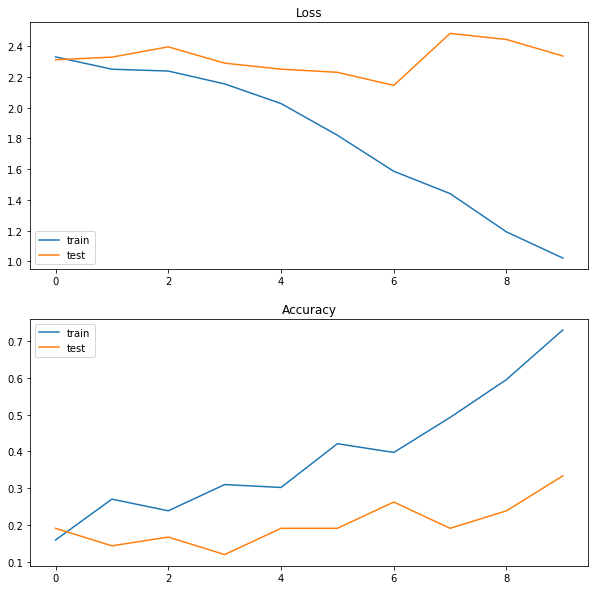

In [17]:
summarize_model(cnn_model, cnn_history, x_train, y_train, x_test, y_test)